In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

2023-06-01 09:29:25.037448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [21]:
img_samples = x_train[0:10]/255.0

In [22]:
img_samples.shape

(10, 32, 32, 3)

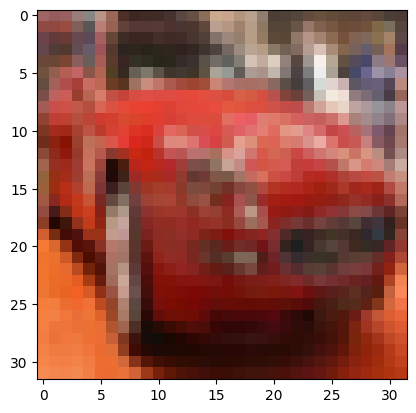

In [23]:
plt.imshow(img_samples[5, : , : , : ])

In [192]:
filters = np.zeros((3, 3, 3, 2))
for i in range(0,3):
    filters[i, i, :, 0] = 1
for i in range(2,-1 ,-1):
    filters[2-i , i ,:,1] = 1

print(filters)


[[[[1. 0.]
   [1. 0.]
   [1. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[0. 1.]
   [0. 1.]
   [0. 1.]]]


 [[[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[1. 1.]
   [1. 1.]
   [1. 1.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]]


 [[[0. 1.]
   [0. 1.]
   [0. 1.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]]

  [[1. 0.]
   [1. 0.]
   [1. 0.]]]]


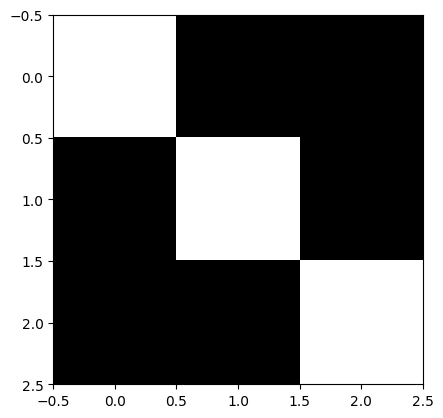

In [194]:
plt.imshow(filters[:,:,:,0])

In [196]:
convolved_images = tf.nn.conv2d(img_samples, filters, strides=1, padding="SAME")

In [198]:
convolved_images.shape

TensorShape([10, 32, 32, 2])

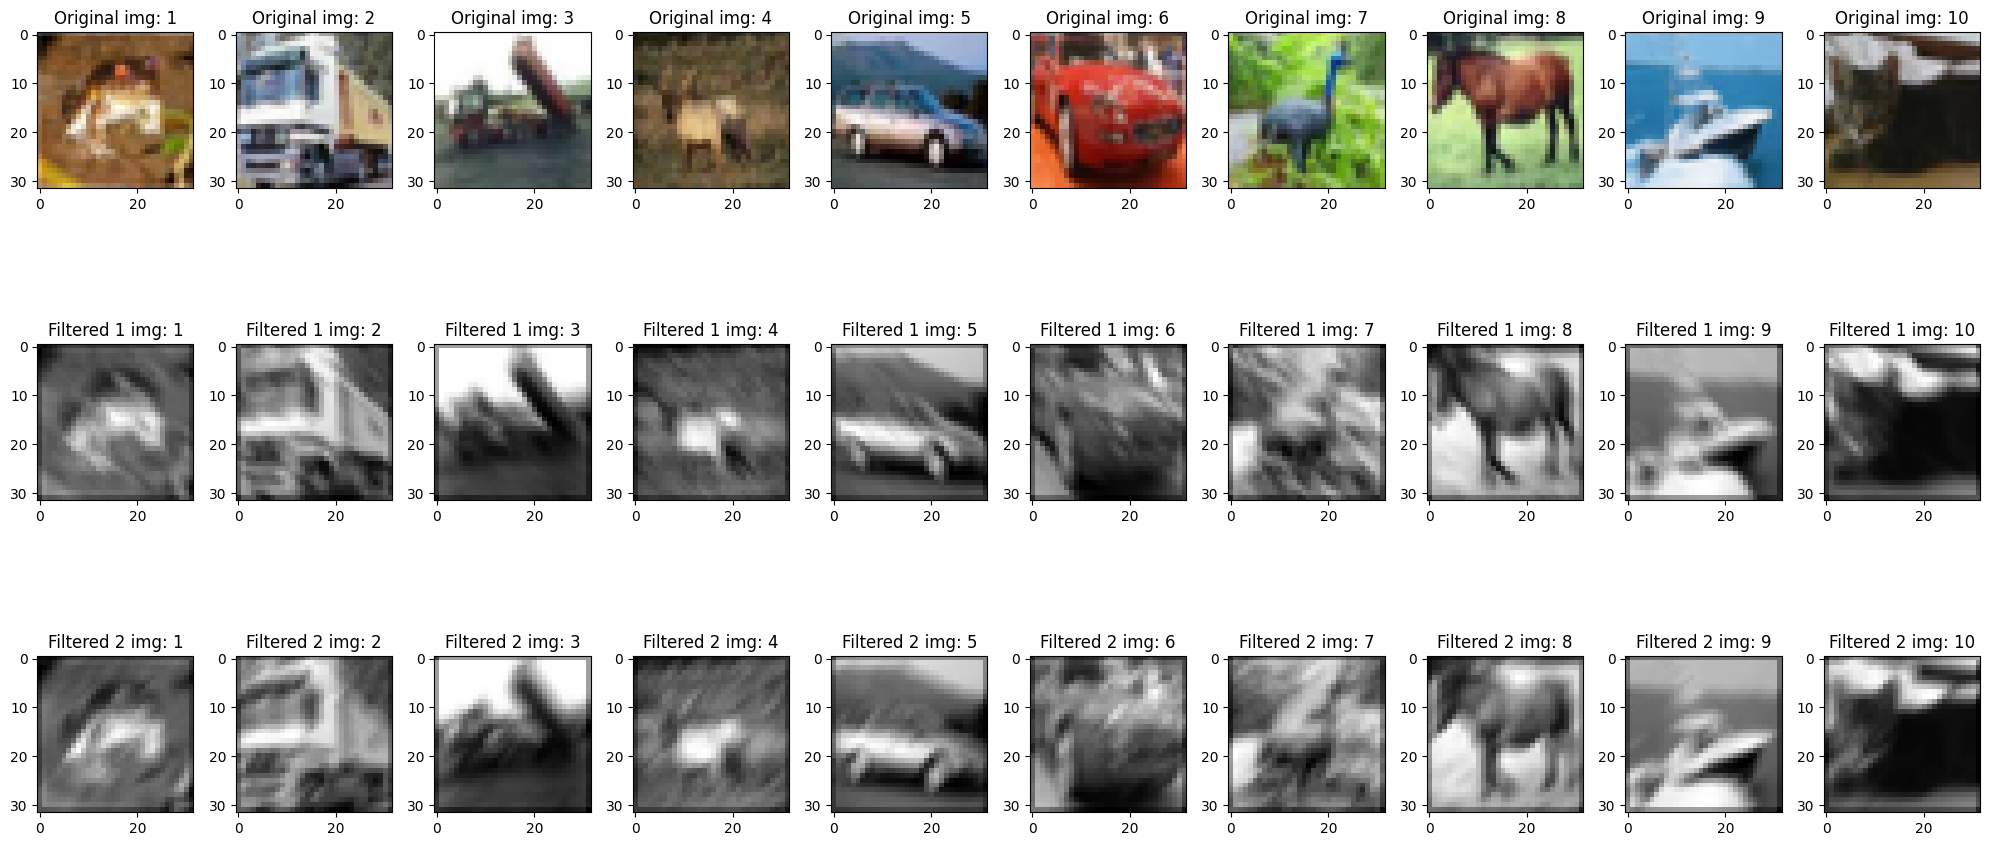

In [232]:
num_images = 10

# Plot the original images
plt.figure(figsize=(20, 10))
for i in range(num_images):
    plt.subplot(3, num_images, i + 1)
    plt.imshow(img_samples[i], cmap='gray')
    plt.title('Original img: %i'%(i+1))

# Plot the images after filtering number 1
for i in range(num_images):
    plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(convolved_images[i,:,:,0], cmap='gray')
    plt.title('Filtered 1 img: %i'%(i+1))

# Plot the images after filtering number 2
for i in range(num_images):
    plt.subplot(3, num_images, 2 * num_images + i + 1)
    plt.imshow(convolved_images[i,:,:,1], cmap='gray')
    plt.title('Filtered 2 img: %i'%(i+1))

plt.tight_layout()
plt.show()
